## 1. Perform the following operations using library functions
### a. Read, Display and write any color image in other formats.
### b. Find RED, GREEN and BLUE plane of the color image.
### c. Convert color image into gray scale image and binary image.
### d. Resize the image by one half and one quarter.
### e. Image rotates by 45, 90 and 180 degrees.

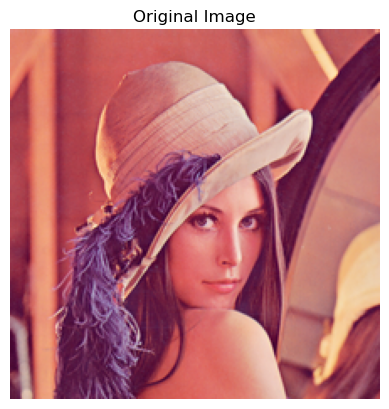

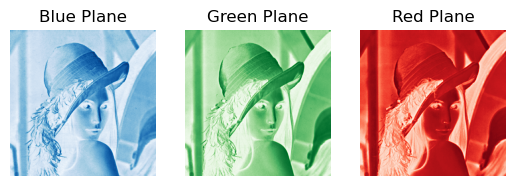

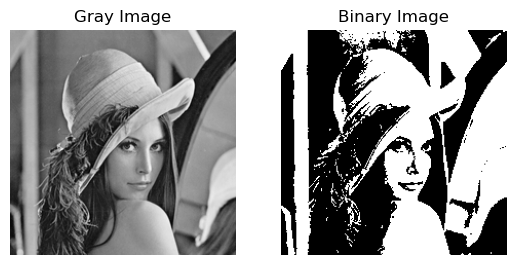

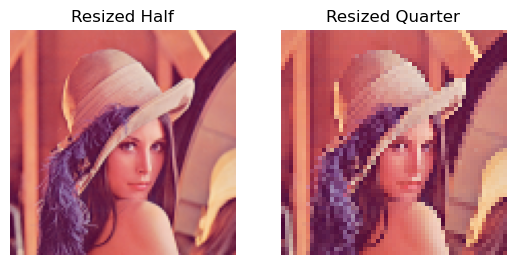

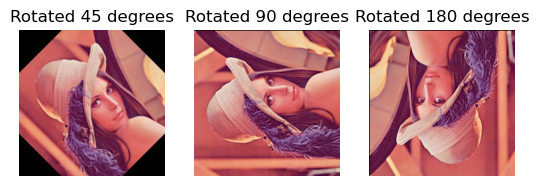

In [ ]:
import cv2
import matplotlib.pyplot as plt

# a. Read and Display the image
image_path = 'lena_color.png'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

# b. Display RED, GREEN and BLUE planes of the color image
blue_plane = image[:, :, 0]
green_plane = image[:, :, 1]
red_plane = image[:, :, 2]

plt.subplot(131)
plt.imshow(blue_plane, cmap='Blues')
plt.axis('off')
plt.title('Blue Plane')

plt.subplot(132)
plt.imshow(green_plane, cmap='Greens')
plt.axis('off')
plt.title('Green Plane')

plt.subplot(133)
plt.imshow(red_plane, cmap='Reds')
plt.axis('off')
plt.title('Red Plane')

plt.show()

# c. Convert color image into gray scale image and binary image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Gray Image')

plt.subplot(122)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Binary Image')

plt.show()

# d. Resize the image by one half and one quarter
resized_half = cv2.resize(image, None, fx=0.5, fy=0.5)
resized_quarter = cv2.resize(image, None, fx=0.25, fy=0.25)

plt.subplot(121)
plt.imshow(cv2.cvtColor(resized_half, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Resized Half')

plt.subplot(122)
plt.imshow(cv2.cvtColor(resized_quarter, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Resized Quarter')

plt.show()

# e. Image rotates by 45, 90 and 180 degrees
rows, cols, _ = image.shape

rotation_matrix_45 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_45 = cv2.warpAffine(image, rotation_matrix_45, (cols, rows))

rotation_matrix_90 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
rotated_90 = cv2.warpAffine(image, rotation_matrix_90, (cols, rows))

rotation_matrix_180 = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
rotated_180 = cv2.warpAffine(image, rotation_matrix_180, (cols, rows))

plt.subplot(131)
plt.imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated 45 degrees')

plt.subplot(132)
plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated 90 degrees')

plt.subplot(133)
plt.imshow(cv2.cvtColor(rotated_180, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated 180 degrees')

plt.show()


### 2. Create black and white images (A) of size 1024x1024. Which consists of alternative horizontal lines of black and white? Each line is of size 128.
### Create black and white images (B) of size 1024x1024. Which consists of alternative vertical
### lines of black and white? Each line is of size128.Perform the following operations on Image A and Image B.
### a. Image addition of A and B
### b. Subtraction of A and B
### c. Multiplying Images of A and B
### a. Create a grayscale image of size 256x1024. Intensity of image should vary sinusoidal.
### b. Create a white image of size 256x256, with black box of size 58x58 at centre.


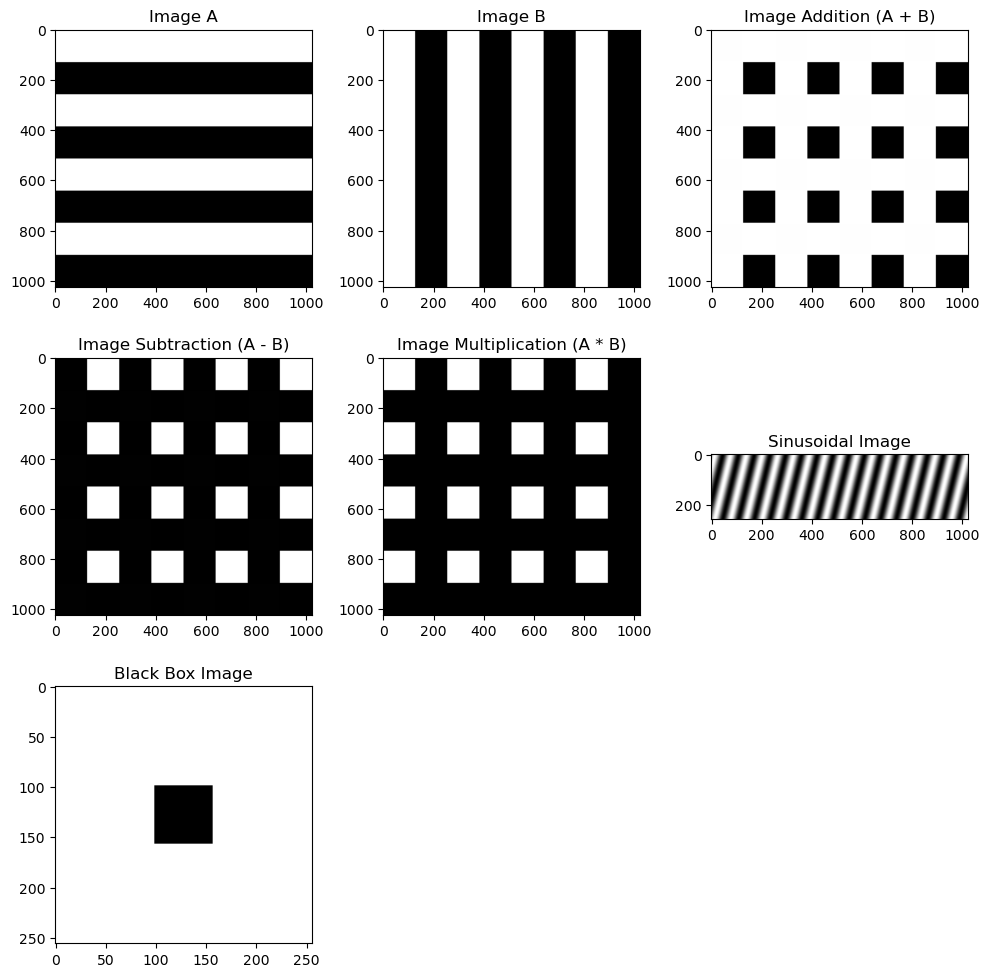

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create Image A with alternating horizontal lines
def create_image_A():
    line_size = 128
    num_lines = 1024 // line_size
    image_A = np.zeros((1024, 1024), dtype=np.uint8)

    for i in range(num_lines):
        if i % 2 == 0:
            image_A[i * line_size : (i + 1) * line_size, :] = 255

    return image_A

# Create Image B with alternating vertical lines
def create_image_B():
    line_size = 128
    num_lines = 1024 // line_size
    image_B = np.zeros((1024, 1024), dtype=np.uint8)

    for i in range(num_lines):
        if i % 2 == 0:
            image_B[:, i * line_size : (i + 1) * line_size] = 255

    return image_B

def create_centered_black_box_image():
    size = 256
    image = np.ones((size, size), dtype=np.uint8) * 255
    box_size = 58
    center = size // 2
    start = center - box_size // 2
    end = start + box_size
    image[start:end, start:end] = 0
    return image

def create_sinusoidal_image():
    height, width = 256, 1024
    y = np.linspace(0, 2 * np.pi, height)
    x = np.arange(width)
    intensity = 128 + 127 * np.sin(y[:, np.newaxis] + x * 0.1)
    return intensity.astype(np.uint8)

# Create images A and B
image_A = create_image_A()
image_B = create_image_B()

# Perform image addition
image_sum = image_A + image_B
image_diff = image_A - image_B
image_mul = image_A * image_B
sinusoidal_image = create_sinusoidal_image()
black_box_image = create_centered_black_box_image()

# Display the original images and the result
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(image_A, cmap='gray')
plt.title('Image A')

plt.subplot(3, 3, 2)
plt.imshow(image_B, cmap='gray')
plt.title('Image B')

plt.subplot(3, 3, 3)
plt.imshow(image_sum, cmap='gray')
plt.title('Image Addition (A + B)')

plt.subplot(3, 3, 4)
plt.imshow(image_diff, cmap='gray')
plt.title('Image Subtraction (A - B)')

plt.subplot(3, 3, 5)
plt.imshow(image_mul, cmap='gray')
plt.title('Image Multiplication (A * B)')

plt.subplot(3, 3, 6)
plt.imshow(sinusoidal_image, cmap='gray')
plt.title('Sinusoidal Image')

plt.subplot(3, 3, 7)
plt.imshow(black_box_image, cmap='gray')
plt.title('Black Box Image')

plt.tight_layout()
plt.show()

### 3. Develop programs for following intensity transformation operation on a gray scale image. Collect any gray scale image from any source. Process that image using these operations.
### a. Image negative

### b. Log transformation and inverse log transform: s = c log (1+r),  c is a const, r ≥ 0. s is pixel intensity of output image, r is the pixel intensity of input image. Study the effect of constant c on the quality of output image.

### c. Power law transformation: Study the effect of different values of Gamma used in this transformation.

### d. Contrast stretching

### e. Gray level slicing

C:\Users\chand\AppData\Local\Temp\ipykernel_10616\1533039813.py:13: RuntimeWarning: divide by zero encountered in log
  return c * np.log(1 + input_image)


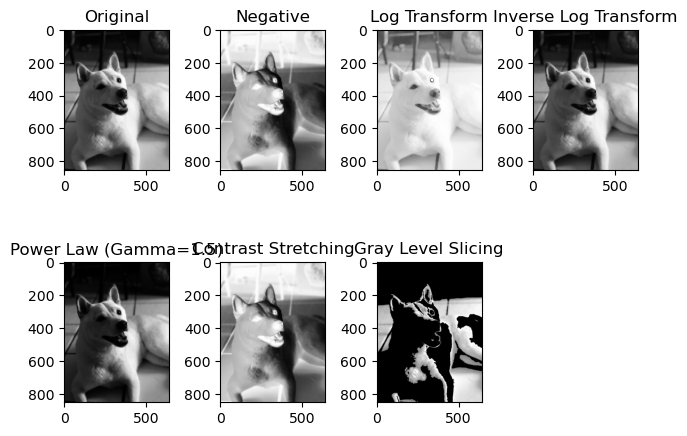

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
input_image = cv2.imread('Dog.jpg', cv2.IMREAD_GRAYSCALE)

# a. Image Negative
negative_image = 255 - input_image

# b. Log Transformation and Inverse Log Transform
def log_transform(input_image, c=1):
    return c * np.log(1 + input_image)

def inverse_log_transform(output_image, c=1):
    return np.exp(output_image / c) - 1

c_value = 1  # Adjust this value for different effects
log_transformed_image = log_transform(input_image, c=c_value)
inverse_log_transformed_image = inverse_log_transform(log_transformed_image, c=c_value)

# c. Power Law Transformation
def power_law_transform(input_image, gamma=1):
    return np.power(input_image, gamma)

gamma_value = 1.5  # Adjust this value for different effects
power_law_transformed_image = power_law_transform(input_image, gamma=gamma_value)

# d. Contrast Stretching
min_pixel = input_image.min()
max_pixel = input_image.max()
contrast_stretched_image = 255 * (input_image - min_pixel) / (max_pixel - min_pixel)

# e. Gray Level Slicing
lower_threshold = 100
upper_threshold = 200
gray_level_slicing_image = input_image.copy()
gray_level_slicing_image[(input_image < lower_threshold) | (input_image > upper_threshold)] = 0

# Display the original and transformed images
images = [input_image, negative_image, log_transformed_image, inverse_log_transformed_image,
          power_law_transformed_image, contrast_stretched_image, gray_level_slicing_image]
titles = ["Original", "Negative", "Log Transform", "Inverse Log Transform",
          f"Power Law (Gamma={gamma_value})", "Contrast Stretching", "Gray Level Slicing"]

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')  # Fix the cmap argument here
    plt.title(titles[i])

plt.tight_layout()
plt.show()

### 4. Develop programs for following spatial filtering operations on a gray scale image.

### a. Averaging: Implement averaging filtering operations for different window sizes and study their effect on the quality of output image. Write your observations on output image quality.

### b. Weighted averaging: Implement weighted averaging filtering operations for different window sizes and study their effect on the quality of output image. Write your observations on output image quality.

### c. Median filtering: Implement weighted averaging filtering operations for different window sizes and study their effect on the quality of output image. Write your observations on output image quality.

### d. Max filtering

### e. Min filtering


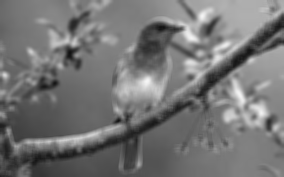

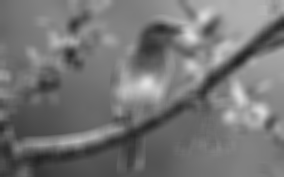

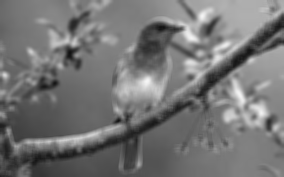

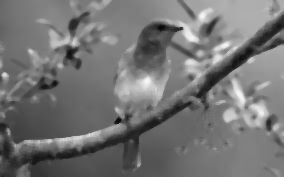

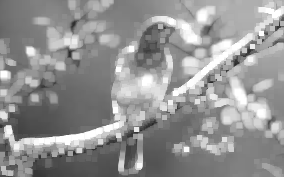

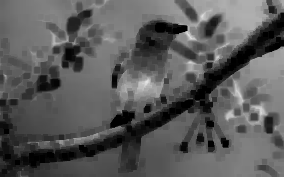

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Function to apply averaging filter
def averaging_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

# Function to apply weighted averaging filter
def weighted_averaging_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)

# Function to apply median filter
def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Function to apply max filter
def max_filter(image, kernel_size):
    return cv2.dilate(image, np.ones((kernel_size, kernel_size), dtype=np.uint8))

# Function to apply min filter
def min_filter(image, kernel_size):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), dtype=np.uint8))

# Example usage
output_average = averaging_filter(image, kernel_size=5)
output_average1 = averaging_filter(image, kernel_size=10)

output_weighted_average = weighted_averaging_filter(image, kernel_size=5)
output_median = median_filter(image, kernel_size=5)
output_max = max_filter(image, kernel_size=5)
output_min = min_filter(image, kernel_size=5)

# Display the output images
cv2_imshow(output_average)
cv2_imshow(output_average1)
cv2_imshow(output_weighted_average)
cv2_imshow(output_median)
cv2_imshow(output_max)
cv2_imshow(output_min)

### 5. Take a gray scale image and add salt and pepper noise. Write programs for following operations and observe their outputs

### a. Linear smoothing or Image averaging

### b. Weighted averaging
### c. Median filtering. Compare the output quality among Image averaging and median filtering.
### d. Max filtering
### e. Min filtering

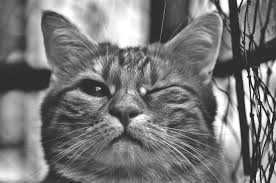

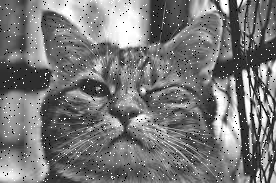

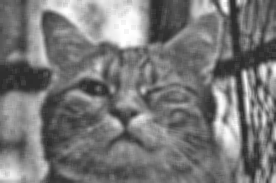

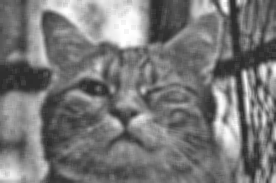

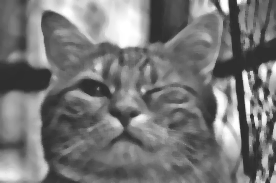

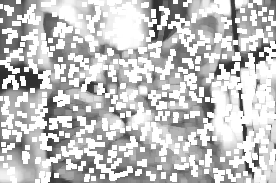

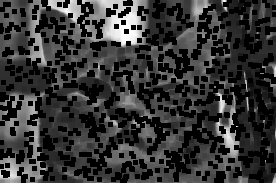

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    # Add salt noise
    salt_pixels = int(total_pixels * salt_prob)
    salt_coordinates = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    noisy_image[salt_coordinates[0], salt_coordinates[1]] = 255

    # Add pepper noise
    pepper_pixels = int(total_pixels * pepper_prob)
    pepper_coordinates = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    noisy_image[pepper_coordinates[0], pepper_coordinates[1]] = 0

    return noisy_image

# Load the grayscale image
img = cv2.imread('Gray_2.jpeg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Unable to load the image.")
else:
    # Add salt and pepper noise
    salt_and_pepper_prob = 0.02  # Adjust as needed
    noisy_image = add_salt_and_pepper_noise(img, salt_and_pepper_prob, salt_and_pepper_prob)

    # a. Linear smoothing or Image averaging
    kernel_size = 5  # Adjust kernel size as needed
    smoothed_image = cv2.blur(noisy_image, (kernel_size, kernel_size))

    # b. Weighted averaging
    weights = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    weighted_smoothed_image = cv2.filter2D(noisy_image, -1, weights)

    # c. Median filtering
    median_filtered_image = cv2.medianBlur(noisy_image, kernel_size)

    # d. Max filtering
    max_filtered_image = cv2.dilate(noisy_image, np.ones((kernel_size, kernel_size), np.uint8))

    # e. Min filtering
    min_filtered_image = cv2.erode(noisy_image, np.ones((kernel_size, kernel_size), np.uint8))

    # Display the original image
    cv2_imshow(img)

    # Display the noisy and filtered images one by one
    cv2_imshow(noisy_image)
    cv2_imshow(smoothed_image)
    cv2_imshow(weighted_smoothed_image)
    cv2_imshow(median_filtered_image)
    cv2_imshow(max_filtered_image)
    cv2_imshow(min_filtered_image)

### 6. Write programs to perform following sharpening operations on a gray scale image
### a. Laplacian filter
### b. Filtering using composite mask
### c. Unsharp masking
### d. High boost filtering
### e. Filtering using first order derivative operators such as sobel and prewitt mask.


Original


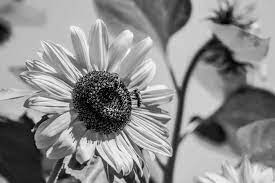

Laplacian


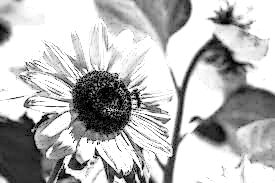

Composite


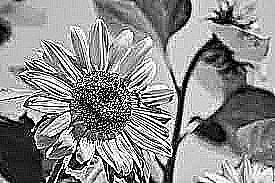

Unsharp Mask


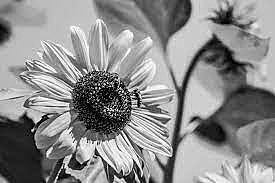

Highboost Filter


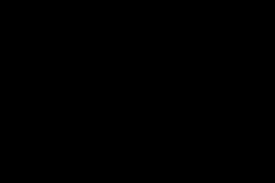

Sobel


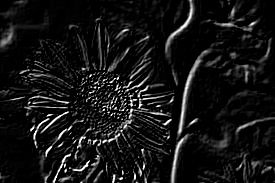

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the grayscale image
img = cv2.imread('Gray_3.png', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Unable to load the image.")
else:
    # a. Laplacian filter for image sharpening
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    laplacian_abs = cv2.convertScaleAbs(laplacian)
    sharpened_image_laplacian = cv2.addWeighted(img, 1.5, laplacian_abs, -0.5, 0)

    # b. Filtering using composite mask
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    sharpened_image_composite = cv2.filter2D(img, -1, kernel)

    # c. Unsharp masking
    gaussian_blur = cv2.GaussianBlur(img, (5, 5), 1.0)
    unsharp_mask = cv2.addWeighted(img, 2, gaussian_blur, -1, 0)

    # d. High boost filtering
    high_boost_k = 1.5
    high_boost_filtered = cv2.addWeighted(img, 1, img, -high_boost_k, 0)

    # e. Filtering using first-order derivative operators (Sobel and Prewitt)
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    print('Original')
    cv2_imshow(img)
    print('Laplacian')
    cv2_imshow(sharpened_image_laplacian)
    print('Composite')
    cv2_imshow(sharpened_image_composite)
    print('Unsharp Mask')
    cv2_imshow(unsharp_mask)
    print('Highboost Filter')
    cv2_imshow(high_boost_filtered)
    print('Sobel')
    cv2_imshow(sobel_combined)

### 7. Write a program to improve contrast of an image using histogram equalization. The prototype of the function is as below:
### histogram_equalisation(input_Image, no_of_bins);
### The function should return the enhanced image. Consider two low contrast input images. Study the nature of the output image quality in each case by varying the number of bins.

Low contrast images


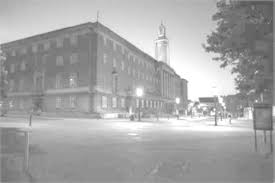

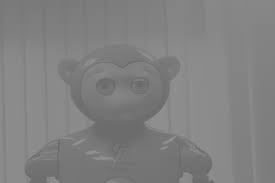

High contrast images


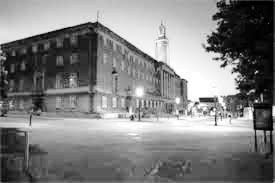

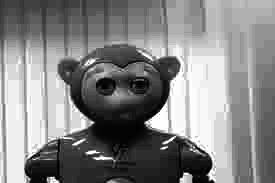

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def histogram_equalization(input_image, no_of_bins):
    hist, bins = np.histogram(input_image.flatten(), no_of_bins,[0,255])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equalized_image = np.interp(input_image, bins[:-1], cdf_normalized)
    equalized_image = np.uint8(equalized_image)
    return equalized_image
input_image1 = cv2.imread('Gray_4.jpeg', cv2.IMREAD_GRAYSCALE)
input_image2 = cv2.imread('Gray_5.jpeg', cv2.IMREAD_GRAYSCALE)
num_bins = 255
output_image1 = histogram_equalization(input_image1, num_bins)
output_image2 = histogram_equalization(input_image2, num_bins)
om1 = histogram_equalization(input_image1, 238)
print("Low contrast images")
cv2_imshow(input_image1)
cv2_imshow(input_image2)
print("High contrast images")
equ1 = cv2.equalizeHist(input_image1)
equ2 = cv2.equalizeHist(input_image2)
cv2_imshow(equ1)
cv2_imshow(equ2)

### 8. Take a low contrast gray scale image
###(A) and a high contrast gray scale image
###(B). Write a program to improve the contrast of A with the help of image B using histogram specification or matching. The prototype of the function is as below:
### Histogram_sp(input_Image, specified_Iage, no_of_bins);
### The function should return the enhanced image.

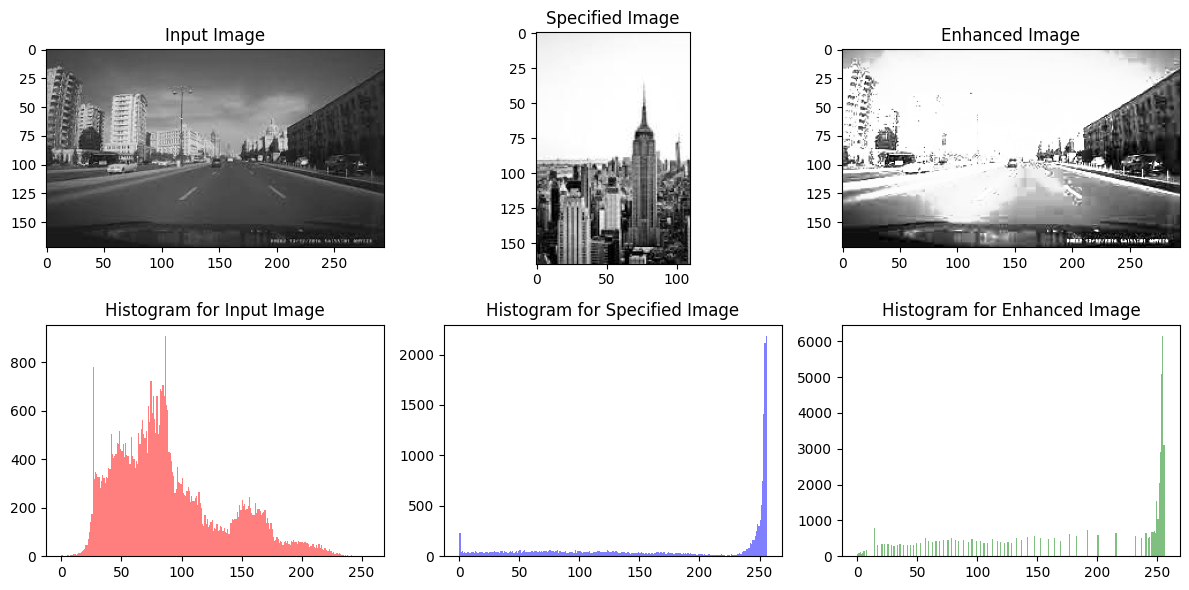

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

def Histogram_sp(input_image, specified_image, no_of_bins):
    # Calculate the histogram of the input and specified images
    hist_input, _ = np.histogram(input_image, bins=no_of_bins, range=(0, 256))
    hist_specified, _ = np.histogram(specified_image, bins=no_of_bins, range=(0, 256))

    # Calculate the cumulative distribution function (CDF) for input and specified histograms
    cdf_input = np.cumsum(hist_input)
    cdf_specified = np.cumsum(hist_specified)

    # Normalize the CDF to have values between 0 and 1
    cdf_input = (cdf_input - cdf_input.min()) / (cdf_input.max() - cdf_input.min())
    cdf_specified = (cdf_specified - cdf_specified.min()) / (cdf_specified.max() - cdf_specified.min())

    # Initialize the mapping function
    mapping = np.zeros(256, dtype=np.uint8)

    # Perform histogram specification
    for i in range(256):
        mapping[i] = np.argmin(np.abs(cdf_input[i] - cdf_specified))

    # Apply the mapping to the input image
    enhanced_image = mapping[input_image]

    return enhanced_image

# Load your low contrast image (A) and high contrast image (B)
image_A = cv2.imread('Gray_6.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path
image_B = cv2.imread('Gray_7.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Specify the number of bins for the histograms
no_of_bins = 256

# Apply histogram specification
enhanced_image = Histogram_sp(image_A, image_B, no_of_bins)

# Plot histograms for the input and specified images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title('Input Image')
plt.imshow(image_A, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Specified Image')
plt.imshow(image_B, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Enhanced Image')
plt.imshow(enhanced_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Histogram for Input Image')
plt.hist(image_A.ravel(), bins=no_of_bins, range=(0, 256), color='red', alpha=0.5)

plt.subplot(2, 3, 5)
plt.title('Histogram for Specified Image')
plt.hist(image_B.ravel(), bins=no_of_bins, range=(0, 256), color='blue', alpha=0.5)

plt.subplot(2, 3, 6)
plt.title('Histogram for Enhanced Image')
plt.hist(enhanced_image.ravel(), bins=no_of_bins, range=(0, 256), color='green', alpha=0.5)

plt.tight_layout()
plt.show()

### 9. Develop programs to implement frequency domain smoothing filters (Ideal, Butterworth and Gaussian) and apply these filters on a gray scale image.


### a. Compare/comment on the output of Ideal, Butterworth and Gaussian Low pass Filters having the same radii (cutoff frequency) value.


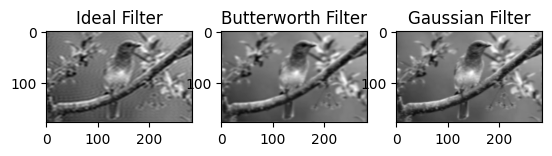

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define filter parameters
cutoff_frequency = 30
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create ideal low-pass filter
ideal_filter = np.zeros((rows, cols), np.uint8)
ideal_filter[crow - cutoff_frequency:crow + cutoff_frequency, ccol - cutoff_frequency:ccol + cutoff_frequency] = 1

# Create Butterworth low-pass filter
n = 2  # Butterworth filter order
butterworth_filter = 1 / (1 + (np.sqrt((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / cutoff_frequency) ** (2 * n))

# Create Gaussian low-pass filter
sigma = cutoff_frequency
gaussian_filter = np.exp(-((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / (2 * sigma ** 2))

# Apply the filters
ideal_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * ideal_filter)))
butterworth_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * butterworth_filter)))
gaussian_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * gaussian_filter)))

# Display the filtered images
plt.subplot(131), plt.imshow(ideal_output, cmap='gray'), plt.title('Ideal Filter')
plt.subplot(132), plt.imshow(butterworth_output, cmap='gray'), plt.title('Butterworth Filter')
plt.subplot(133), plt.imshow(gaussian_output, cmap='gray'), plt.title('Gaussian Filter')
plt.show()

### b. Consider a suitable gray scale image and demonstrate the ringing effect on the output of Ideal low pass frequency domain filter.

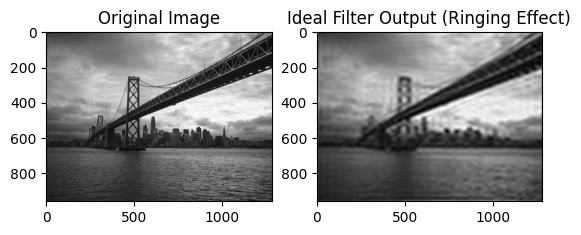

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a high-contrast grayscale image with sharp edges
image = cv2.imread('Gray_8.jpg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define the cutoff frequency for the Ideal low-pass filter
cutoff_frequency = 30
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create an Ideal low-pass filter
ideal_filter = np.zeros((rows, cols), np.uint8)
ideal_filter[crow - cutoff_frequency:crow + cutoff_frequency, ccol - cutoff_frequency:ccol + cutoff_frequency] = 1

# Apply the Ideal filter to the Fourier transform
ideal_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * ideal_filter)))

# Display the original image and the filtered image
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(ideal_output, cmap='gray'), plt.title('Ideal Filter Output (Ringing Effect)')
plt.show()


### C. Compare the output of Butterworth low pass filters (order n=2) for different cut-off frequencies (5, 15, 30, 90, 120).

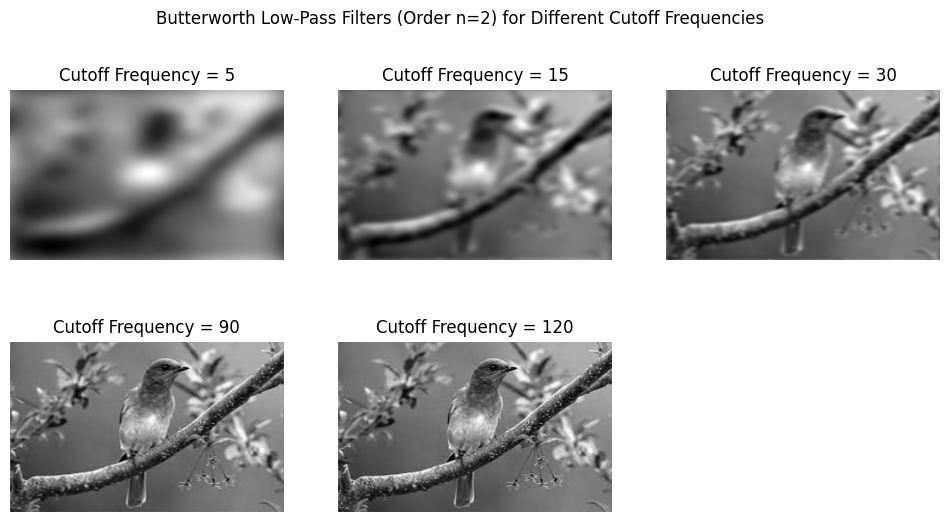

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define Butterworth filter order (n=2)
n = 2

# Define a range of cutoff frequencies
cutoff_frequencies = [5, 15, 30, 90, 120]

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a subplot for displaying the filtered images
plt.figure(figsize=(12, 6))
plt.suptitle('Butterworth Low-Pass Filters (Order n=2) for Different Cutoff Frequencies')

for i, cutoff_frequency in enumerate(cutoff_frequencies):
    # Create Butterworth low-pass filter
    butterworth_filter = 1 / (1 + (np.sqrt((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / cutoff_frequency) ** (2 * n))

    # Apply the Butterworth filter to the Fourier Transform
    butterworth_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * butterworth_filter)))

    # Display the filtered image in a subplot
    plt.subplot(2, 3, i + 1)
    plt.imshow(butterworth_output, cmap='gray')
    plt.title(f'Cutoff Frequency = {cutoff_frequency}')
    plt.axis('off')

plt.show()

### d. Compare the output of Gaussian low pass filters for different cut-off frequencies (5, 15, 30, 90, and 120).


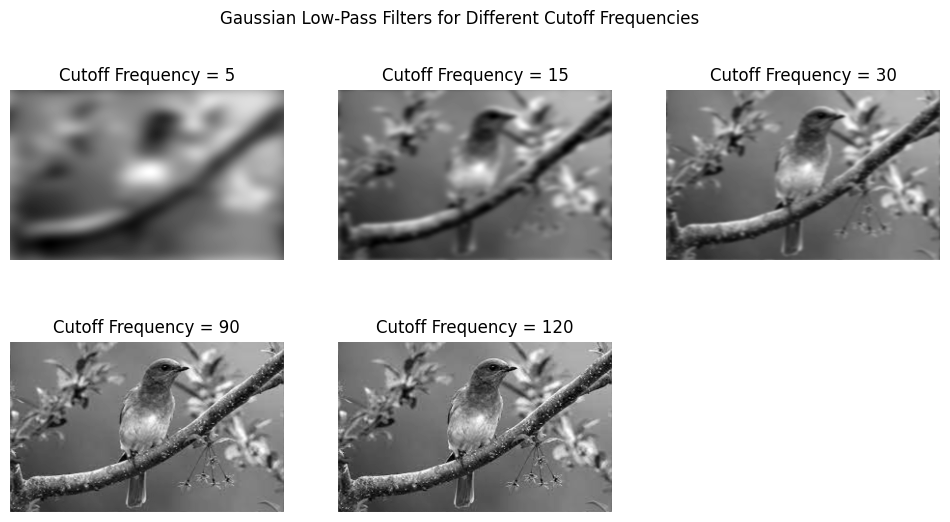

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define a range of cutoff frequencies
cutoff_frequencies = [5, 15, 30, 90, 120]

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a subplot for displaying the filtered images
plt.figure(figsize=(12, 6))
plt.suptitle('Gaussian Low-Pass Filters for Different Cutoff Frequencies')

for i, cutoff_frequency in enumerate(cutoff_frequencies):
    # Create Gaussian low-pass filter
    sigma = cutoff_frequency
    gaussian_filter = np.exp(-((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / (2 * sigma ** 2))

    # Apply the Gaussian filter to the Fourier Transform
    gaussian_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * gaussian_filter)))

    # Display the filtered image in a subplot
    plt.subplot(2, 3, i + 1)
    plt.imshow(gaussian_output, cmap='gray')
    plt.title(f'Cutoff Frequency = {cutoff_frequency}')
    plt.axis('off')

plt.show()

### 10. Develop programs to implement frequency domain sharpening/High pass filters (Ideal, Butterworth and Gaussian) and apply these filters on a gray scale image.

### a. Compare/comment on the output of Ideal, Butterworth and Gaussian High pass Filters having the same radii (cutoff frequency) value.


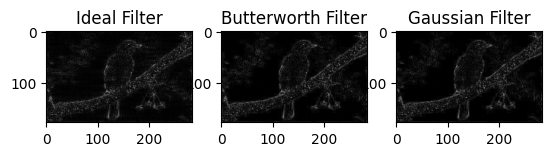

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define filter parameters
cutoff_frequency = 30
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create Ideal high-pass filter
ideal_filter = np.ones((rows, cols), np.uint8)
ideal_filter[crow - cutoff_frequency:crow + cutoff_frequency, ccol - cutoff_frequency:ccol + cutoff_frequency] = 0

# Create Butterworth high-pass filter
n = 2  # Butterworth filter order
butterworth_filter = 1 - (1 / (1 + (np.sqrt((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / cutoff_frequency) ** (2 * n)))

# Create Gaussian high-pass filter
sigma = cutoff_frequency
gaussian_filter = 1 - np.exp(-((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / (2 * sigma ** 2))

# Apply the filters
ideal_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * ideal_filter)))
butterworth_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * butterworth_filter)))
gaussian_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * gaussian_filter)))

# Display the filtered images
plt.subplot(131), plt.imshow(ideal_output, cmap='gray'), plt.title('Ideal Filter')
plt.subplot(132), plt.imshow(butterworth_output, cmap='gray'), plt.title('Butterworth Filter')
plt.subplot(133), plt.imshow(gaussian_output, cmap='gray'), plt.title('Gaussian Filter')
plt.show()


###b. Consider a suitable gray scale image and demonstrate the ringing effect on the output of Ideal high pass frequency domain filter.


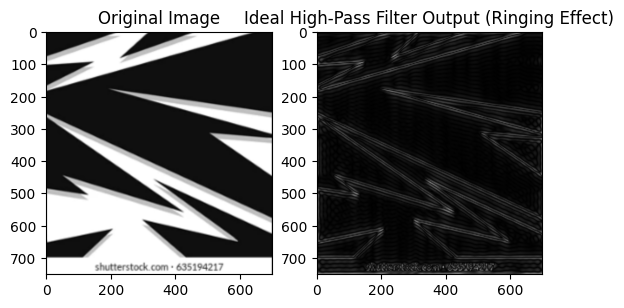

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a suitable grayscale image with sharp edges
image = cv2.imread('Gray_9.png', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define the cutoff frequency for the Ideal high-pass filter
cutoff_frequency = 30
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create an Ideal high-pass filter
ideal_filter = np.ones((rows, cols), np.uint8)
ideal_filter[crow - cutoff_frequency:crow + cutoff_frequency, ccol - cutoff_frequency:ccol + cutoff_frequency] = 0

# Apply the Ideal filter to the Fourier transform
ideal_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * ideal_filter)))

# Display the original image and the filtered image
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(ideal_output, cmap='gray'), plt.title('Ideal High-Pass Filter Output (Ringing Effect)')
plt.show()

### c. Compare the output of Butterworth high pass filters (order n=2) for different cut-off frequencies (5, 15, 30, 90, 120).


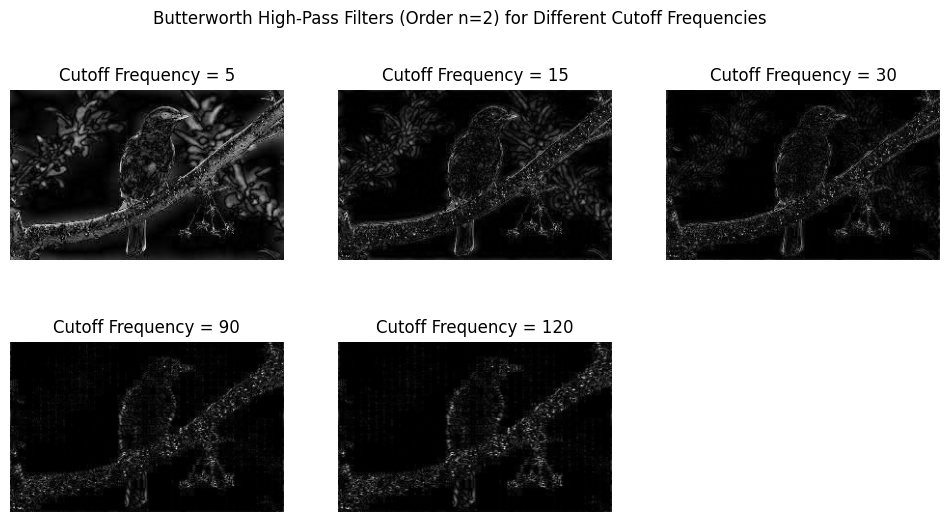

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define Butterworth filter order (n=2)
n = 2

# Define a range of cutoff frequencies
cutoff_frequencies = [5, 15, 30, 90, 120]

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a subplot to display filtered images
plt.figure(figsize=(12, 6))
plt.suptitle('Butterworth High-Pass Filters (Order n=2) for Different Cutoff Frequencies')

for i, cutoff_frequency in enumerate(cutoff_frequencies):
    # Create Butterworth high-pass filter
    butterworth_filter = 1 - (1 / (1 + (np.sqrt((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / cutoff_frequency) ** (2 * n)))

    # Apply the Butterworth filter to the Fourier Transform
    butterworth_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * butterworth_filter)))

    # Display the filtered image in a subplot
    plt.subplot(2, 3, i + 1)
    plt.imshow(butterworth_output, cmap='gray')
    plt.title(f'Cutoff Frequency = {cutoff_frequency}')
    plt.axis('off')

plt.show()

### d. Compare the output of Gaussian high pass filters for different cut-off frequencies (5, 15, 30, 90, and 120).

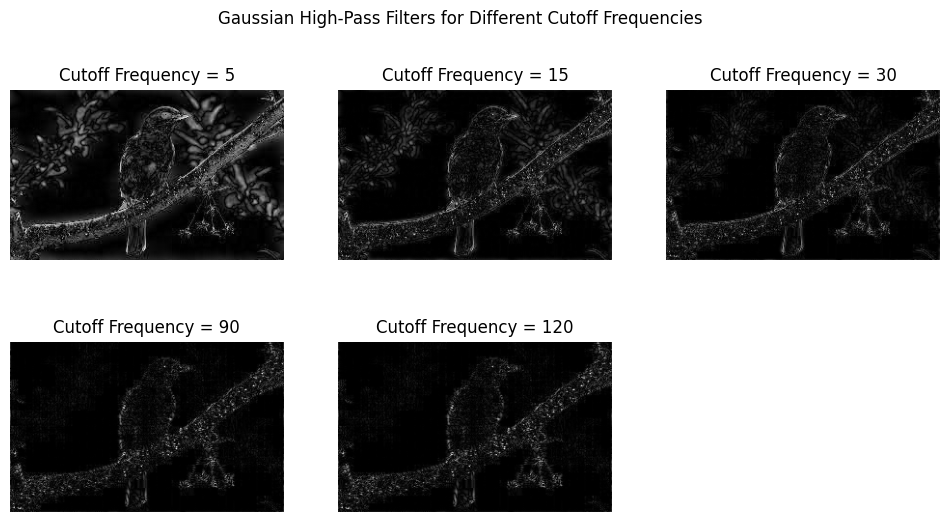

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image = cv2.imread('Gray_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Define a range of cutoff frequencies
cutoff_frequencies = [5, 15, 30, 90, 120]

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Create a subplot to display filtered images
plt.figure(figsize=(12, 6))
plt.suptitle('Gaussian High-Pass Filters for Different Cutoff Frequencies')

for i, cutoff_frequency in enumerate(cutoff_frequencies):
    # Create Gaussian high-pass filter
    sigma = cutoff_frequency
    gaussian_filter = 1 - np.exp(-((np.arange(rows)[:, np.newaxis] - crow) ** 2 + (np.arange(cols) - ccol) ** 2) / (2 * sigma ** 2))

    # Apply the Gaussian filter to the Fourier Transform
    gaussian_output = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * gaussian_filter)))

    # Display the filtered image in a subplot
    plt.subplot(2, 3, i + 1)
    plt.imshow(gaussian_output, cmap='gray')
    plt.title(f'Cutoff Frequency = {cutoff_frequency}')
    plt.axis('off')

plt.show()

###11. Develop program to add different types of noise in a gray scale image and write functions to implement following filters for image restoration in presence of these noises.
### a. Remove Salt and Pepper Noise
### b. Minimize Gaussian noise
### c. Median filter and Weiner filter

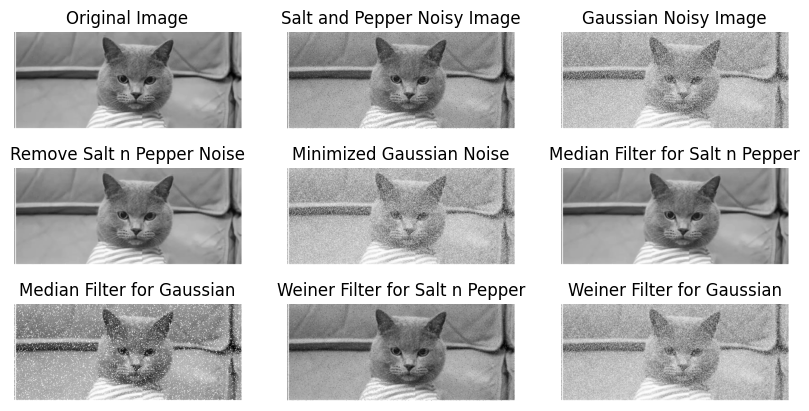

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    salt_pixels = int(total_pixels * salt_prob)
    pepper_pixels = int(total_pixels * pepper_prob)

    # Generate random coordinates for salt
    salt_rows = np.random.randint(0, image.shape[0], size=salt_pixels)
    salt_cols = np.random.randint(0, image.shape[1], size=salt_pixels)

    # Generate random coordinates for pepper
    pepper_rows = np.random.randint(0, image.shape[0], size=pepper_pixels)
    pepper_cols = np.random.randint(0, image.shape[1], size=pepper_pixels)

    noisy_image[salt_rows, salt_cols] = 255
    noisy_image[pepper_rows, pepper_cols] = 0

    return noisy_image


def add_gaussian_noise(image, mean, sigma):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)

    return noisy_image

def remove_salt_and_pepper_noise(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def minimize_gaussian_noise(image, ksize=3, sigma=0):
    return cv2.GaussianBlur(image, (ksize, ksize), sigma)

def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def weiner_filter(image, kernel_size=3, noise_variance=1):
    return cv2.filter2D(image, -1, kernel=np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size), delta=noise_variance)

# Load an image (replace 'image.jpg' with the path to your image)
image = cv2.imread('Gray_10.png', cv2.IMREAD_GRAYSCALE)

# Add salt and pepper noise to the image
noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
noisy_image2 = add_gaussian_noise(image, mean=0,sigma=2)

# Apply restoration filters
restored_image_saltnpepper = remove_salt_and_pepper_noise(noisy_image,kernel_size =3)
restored_image_median = median_filter(noisy_image)
restored_image_median2 = median_filter(noisy_image2)
restored_image_gaussian = minimize_gaussian_noise(noisy_image2)
restored_image_weiner = weiner_filter(noisy_image, kernel_size=3, noise_variance=0.01)
restored_image_weiner2 = weiner_filter(noisy_image2, kernel_size=3, noise_variance=0.01)

# Display the original, noisy, and restored images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(331)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(332)
plt.title('Salt and Pepper Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(333)
plt.title('Gaussian Noisy Image')
plt.imshow(noisy_image2, cmap='gray')
plt.axis('off')

plt.subplot(334)
plt.title('Remove Salt n Pepper Noise')
plt.imshow(restored_image_saltnpepper, cmap='gray')
plt.axis('off')

plt.subplot(335)
plt.title('Minimized Gaussian Noise')
plt.imshow(restored_image_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(336)
plt.title('Median Filter for Salt n Pepper')
plt.imshow(restored_image_median, cmap='gray')
plt.axis('off')

plt.subplot(337)
plt.title('Median Filter for Gaussian')
plt.imshow(restored_image_median2, cmap='gray')
plt.axis('off')

plt.subplot(338)
plt.title('Weiner Filter for Salt n Pepper')
plt.imshow(restored_image_weiner, cmap='gray')
plt.axis('off')

plt.subplot(339)
plt.title('Weiner Filter for Gaussian')
plt.imshow(restored_image_weiner2, cmap='gray')
plt.axis('off')


plt.show()

### 12. Write and execute program for image morphological operations erosion and dilation.

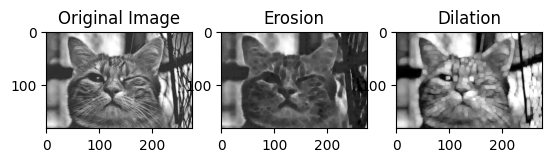

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('Gray_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not loaded.")
    exit()

# Define the kernel for morphological operations
kernel_size = (5, 5)  # You can adjust the kernel size as needed
kernel = np.ones(kernel_size, np.uint8)

# Erosion
erosion_result = cv2.erode(image, kernel, iterations=1)

# Dilation
dilation_result = cv2.dilate(image, kernel, iterations=1)

# Display original, erosion, and dilation images
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(erosion_result, cmap='gray'), plt.title('Erosion')
plt.subplot(133), plt.imshow(dilation_result, cmap='gray'), plt.title('Dilation')

plt.show()


### 13. Implement Morphological smoothing using opening and closing

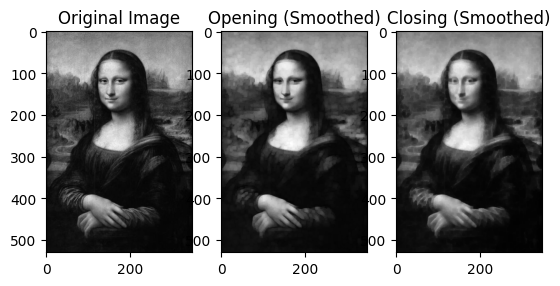

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('Gray_11.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not loaded.")
    exit()

# Define the kernel for morphological operations
kernel_size = (5, 5)  # You can adjust the kernel size as needed
kernel = np.ones(kernel_size, np.uint8)

# Opening (erosion followed by dilation)
opening_result = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
closing_result = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display original, opening, and closing images
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(opening_result, cmap='gray'), plt.title('Opening (Smoothed)')
plt.subplot(133), plt.imshow(closing_result, cmap='gray'), plt.title('Closing (Smoothed)')

plt.show()

### 14. Develop program to implement point and line detection masks. Detect points and lines using these masks for a given gray scale image.


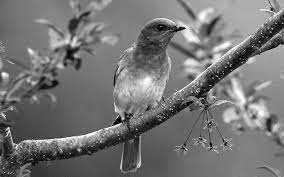

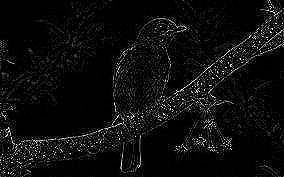

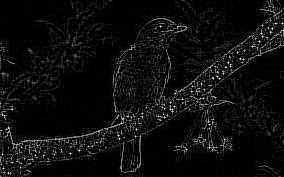

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_points(image):
    # Define a 3x3 kernel for point detection
    point_kernel = np.array([[0, -1, 0],
                            [-1, 4, -1],
                            [0, -1, 0]], dtype=np.float32)

    # Apply convolution to detect points
    points_image = cv2.filter2D(image, -1, point_kernel)

    return points_image

def detect_lines(image):
    # Define a 3x3 kernel for line detection (horizontal)
    line_kernel_horizontal = np.array([[-1, -1, -1],
                                       [2, 2, 2],
                                       [-1, -1, -1]], dtype=np.float32)

    # Define a 3x3 kernel for line detection (vertical)
    line_kernel_vertical = np.array([[-1, 2, -1],
                                     [-1, 2, -1],
                                     [-1, 2, -1]], dtype=np.float32)

    # Apply convolution to detect horizontal and vertical lines
    lines_image_horizontal = cv2.filter2D(image, -1, line_kernel_horizontal)
    lines_image_vertical = cv2.filter2D(image, -1, line_kernel_vertical)

    # Combine the horizontal and vertical line detection results
    lines_image = cv2.addWeighted(lines_image_horizontal, 0.5, lines_image_vertical, 0.5, 0)

    return lines_image

def main():
    # Load the grayscale image
    image_path = "Gray_1.jpeg"
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if gray_image is None:
        print("Error: Unable to load the image.")
        return

    # Perform point detection
    points_result = detect_points(gray_image)

    # Perform line detection
    lines_result = detect_lines(gray_image)

    # Display the original image
    cv2_imshow(gray_image)

    # Display the result of point detection
    cv2_imshow(points_result)

    # Display the result of line detection
    cv2_imshow(lines_result)

if __name__ == "__main__":
    main()

### 15. Develop programs for edge detection using different edge detection mask.

### Sobel Operator:

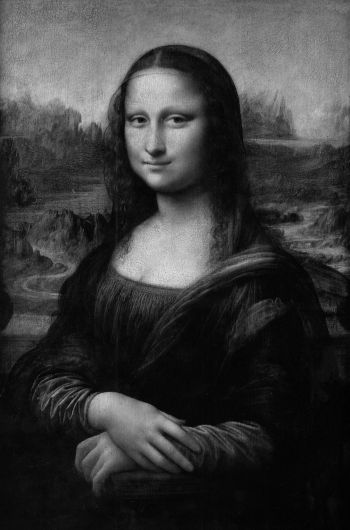

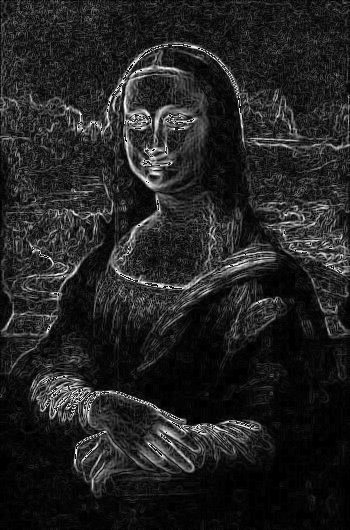

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def edge_detection_sobel(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel operators
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # Combine x and y gradients
    edges = np.sqrt(sobel_x**2 + sobel_y**2)

    # Convert the result to uint8
    edges = np.uint8(edges)

    # Display the original and edges
    cv2_imshow(img)
    cv2_imshow(edges)

# Example usage
edge_detection_sobel('Gray_11.jpg')

###Prewitt Operator:

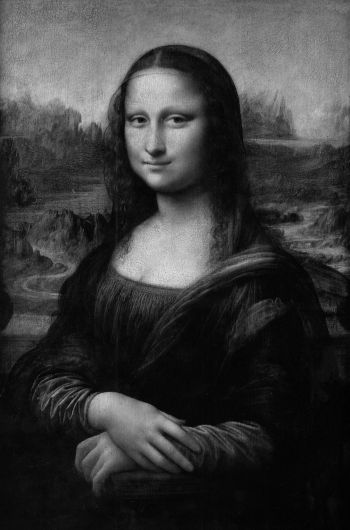

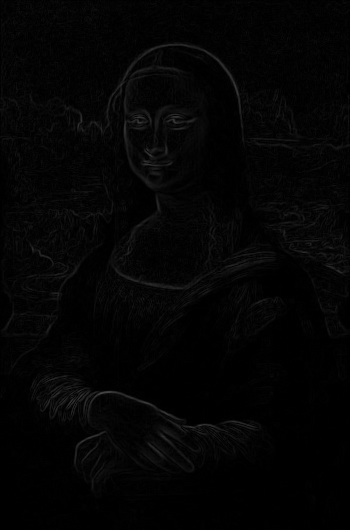

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def edge_detection_prewitt(image_path):
    # Read the image
    img = cv2.imread('Gray_11.jpg', cv2.IMREAD_GRAYSCALE)

    # Apply Prewitt operators
    prewitt_kx = cv2.getDerivKernels(1, 0, 3, normalize=True)
    prewitt_ky = cv2.getDerivKernels(0, 1, 3, normalize=True)

    prewitt_x = cv2.filter2D(img, cv2.CV_64F, prewitt_kx[0] * prewitt_kx[1].T)
    prewitt_y = cv2.filter2D(img, cv2.CV_64F, prewitt_ky[0] * prewitt_ky[1].T)

    # Combine x and y gradients
    edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Convert the result to uint8
    edges = np.uint8(edges)

    # Display the original and edges
    cv2_imshow(img)
    cv2_imshow(edges)

# Example usage
edge_detection_prewitt('Gray_11.jpg')

### 16. Develop programs to achieve image segmentation using


### Basic Global thresholding


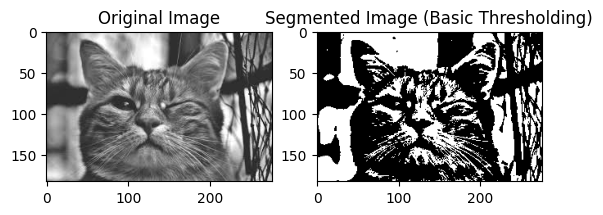

In [17]:
import cv2
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('Gray_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Set a threshold value
threshold_value = 127

# Apply basic global thresholding
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and segmented images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(binary_image, cmap='gray'), plt.title('Segmented Image (Basic Thresholding)')
plt.show()

### Optimal global thresholding or Otsu’s thresholding


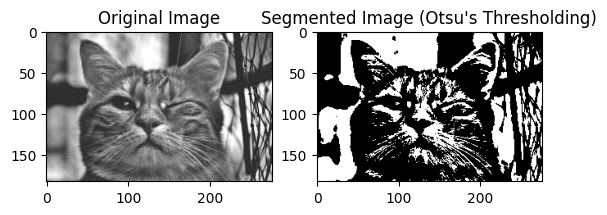

In [18]:
import cv2
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('Gray_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and segmented images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(binary_image, cmap='gray'), plt.title('Segmented Image (Otsu\'s Thresholding)')
plt.show()